In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [46]:
df = pd.read_csv("diabetes.csv")
df.columns = [i.lower() for i in df.columns]

In [49]:
#el 1 es la clase minoritaria
df_balanced = df[df["outcome"]==1]
#tomo una muestra de la mayoritaria del numero que tengo en la minoritaria
muestra     = df[df["outcome"]==0].sample(len(df_balanced),random_state =0)
#junto las dos
df_balanced = df_balanced.append(muestra).reset_index(drop=True)

X, y        = df_balanced.drop("outcome",axis=1), df_balanced["outcome"]

In [50]:
#dividiendo en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

#### REGRESION LOGISTICA

In [35]:
clf    = LogisticRegression(random_state=0).fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       148
           1       0.72      0.55      0.63        83

    accuracy                           0.76       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.76      0.76      0.75       231



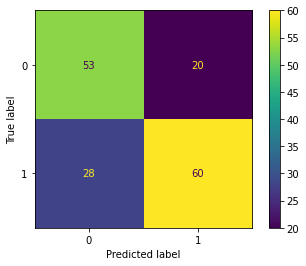

In [55]:
plot_confusion_matrix(clf, X_test, y_test)  

In [51]:
clf    = LogisticRegression(random_state=0).fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.73      0.69        73
           1       0.75      0.68      0.71        88

    accuracy                           0.70       161
   macro avg       0.70      0.70      0.70       161
weighted avg       0.71      0.70      0.70       161



In [38]:
#se establece un nombre de guardado
file_name = "log_reg.pkl"
# save
pickle.dump(clf, open(file_name, "wb"))

# carga
log_model_loaded = pickle.load(open(file_name, "rb"))

# test para ver si da mismos resultados
y_pred           = log_model_loaded.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       148
           1       0.72      0.55      0.63        83

    accuracy                           0.76       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.76      0.76      0.75       231



### XGBOOST

In [53]:
model  = xgb.XGBClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.68      0.69        73
           1       0.74      0.75      0.75        88

    accuracy                           0.72       161
   macro avg       0.72      0.72      0.72       161
weighted avg       0.72      0.72      0.72       161



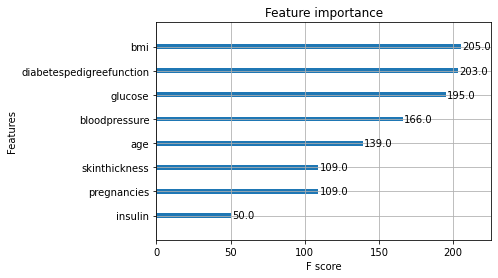

In [57]:
xgb.plot_importance(model)
plt.show()

In [37]:
#se establece un nombre de guardado
file_name = "xgb_reg.pkl"
# save
pickle.dump(model, open(file_name, "wb"))

# load
xgb_model_loaded = pickle.load(open(file_name, "rb"))

# test
y_pred           = xgb_model_loaded.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       148
           1       0.65      0.60      0.63        83

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

